In [16]:
import os
os.chdir(r"C:\Users\Nikhi\Documents\proteopredict")   # set working directory to project root
print("Current working directory:", os.getcwd())


Current working directory: C:\Users\Nikhi\Documents\proteopredict


✓ Training history loaded successfully.


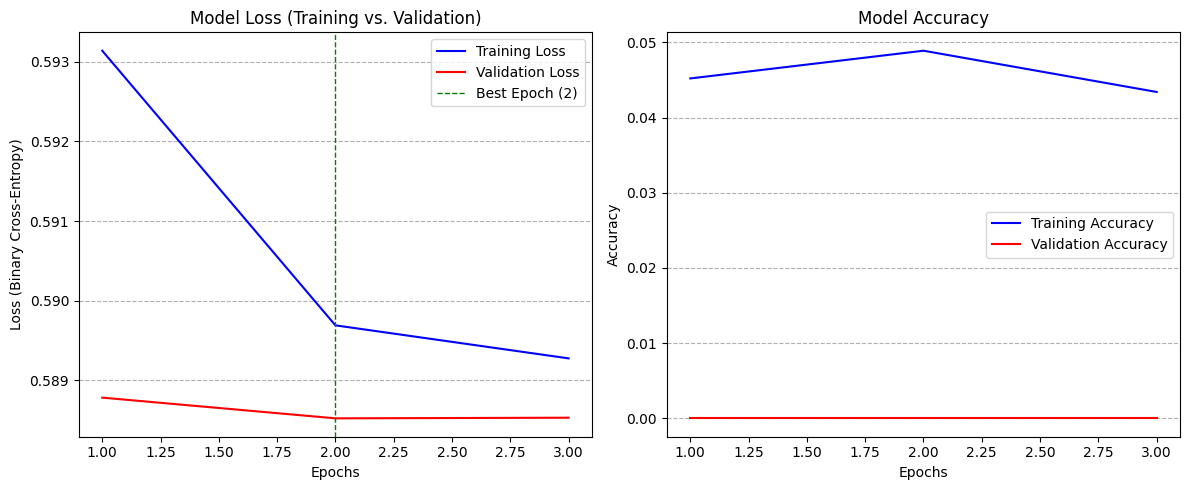

In [17]:

import json
import matplotlib.pyplot as plt
from pathlib import Path

# --- Configuration ---
# Path to the training history file (assuming you are running the notebook from the project root)
history_file_path = Path("models") / "training_history.json" 

# --- Load Data ---
try:
    with open(history_file_path, "r") as f:
        hist = json.load(f)
    print("✓ Training history loaded successfully.")
except FileNotFoundError:
    print(f"Error: History file not found at {history_file_path}. Please check the path.")
    hist = None

if hist:
    epochs = range(1, len(hist['loss']) + 1)
    
    # --- Plot 1: Loss Curve (The most important diagnostic tool) ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    
    plt.plot(epochs, hist["loss"], 'b', label="Training Loss")
    plt.plot(epochs, hist["val_loss"], 'r', label="Validation Loss")
    
    # Highlight the point where Early Stopping likely occurred
    min_val_loss_epoch = hist["val_loss"].index(min(hist["val_loss"])) + 1
    plt.axvline(x=min_val_loss_epoch, color='g', linestyle='--', linewidth=1, label=f'Best Epoch ({min_val_loss_epoch})')

    plt.title("Model Loss (Training vs. Validation)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss (Binary Cross-Entropy)")
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    
    
    # --- Plot 2: Accuracy/Metric Curve (Optional, but useful) ---
    plt.subplot(1, 2, 2)
    
    # Keras saves metrics like 'precision' and 'recall' as averages over all classes
    # If you see 'val_precision', use that.
    
    # Use 'val_accuracy' which is always available
    if 'val_accuracy' in hist:
        plt.plot(epochs, hist["accuracy"], 'b', label="Training Accuracy")
        plt.plot(epochs, hist["val_accuracy"], 'r', label="Validation Accuracy")
        plt.title("Model Accuracy")
        plt.ylabel("Accuracy")
    elif 'f1_score_micro' in hist:
        # If you later save Micro F1 to history, you can plot it here
        pass
    else:
        # Use Keras' default validation precision
        plt.plot(epochs, hist["val_precision"], 'r', label="Validation Precision")
        plt.plot(epochs, hist["val_recall"], 'g', label="Validation Recall")
        plt.title("Model Precision and Recall")
        plt.ylabel("Score")


    plt.xlabel("Epochs")
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    
    plt.tight_layout()
    plt.show()